# Homework2 Visualization

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [3]:
print(os.getcwd())
print(os.path.dirname(os.getcwd()))
print(os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "data"))

/home/haitao/homework_fall2023-main/hw2/cs285/scripts
/home/haitao/homework_fall2023-main/hw2/cs285
/home/haitao/homework_fall2023-main/hw2/data


In [4]:
log_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "data")
run_folders = [os.path.join(log_dir, run) for run in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, run))]

## Experiment 1: Policy Gradient

In [5]:
cartpole_small = [f for f in run_folders if ('pg_cartpole' in f) and ('lb' not in f)]
cartpole_large = [f for f in run_folders if ('pg_cartpole' in f) and ('lb' in f)]

- small batch_size: -b 1000

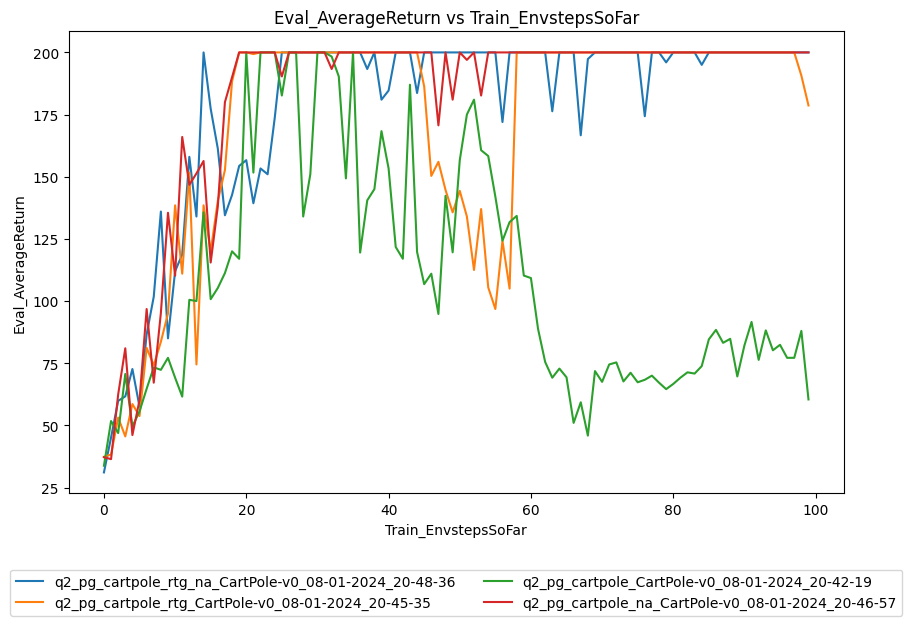

In [6]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in cartpole_small:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

# Show plot
plt.show()

- Large batch_size: -b=4000

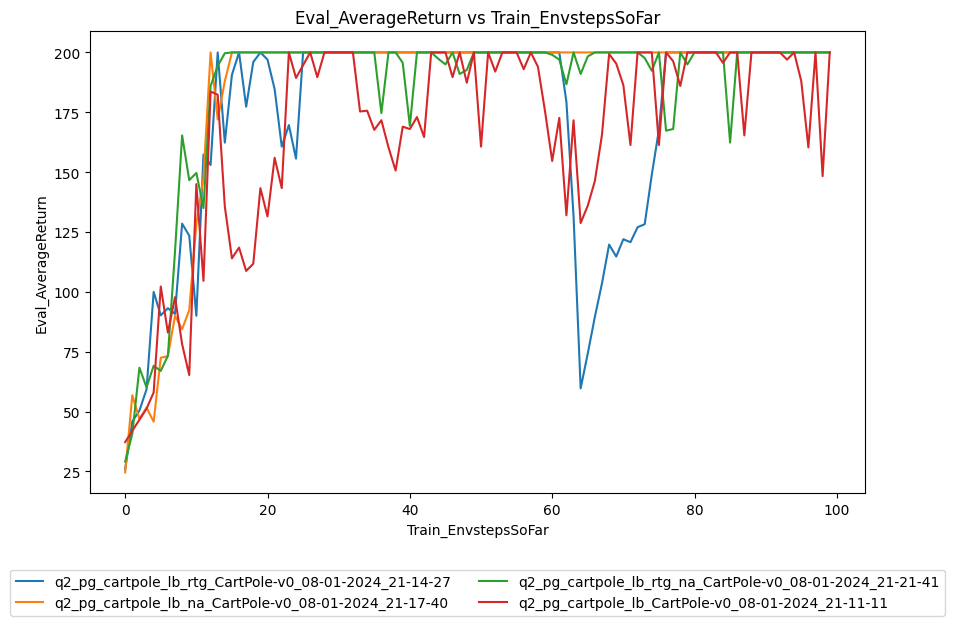

In [7]:
plt.figure(figsize=(10, 6))

# Loop through large_batch run folder to extract and plot the data
for run_folder in cartpole_large:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

# Show plot
plt.show()

Answer the following questions briefly:

– Which value estimator has better performance without advantage normalization: the trajectory-centric
one, or the one using reward-to-go? 

reward-to-go

– Did advantage normalization help? 

yes

– Did the batch size make an impact? 

increasing the learning speed

## Experiment 2: Baseline

In [8]:
cheetah_basic = [f for f in run_folders if ('pg_cheetah' in f) and ('baseline' not in f)]
cheetah_baseline = [f for f in run_folders if ('pg_cheetah' in f) and ('baseline' in f)]

- basic policy gradient

Text(0.5, 1.0, 'Eval_AverageReturn vs Train_EnvstepsSoFar')

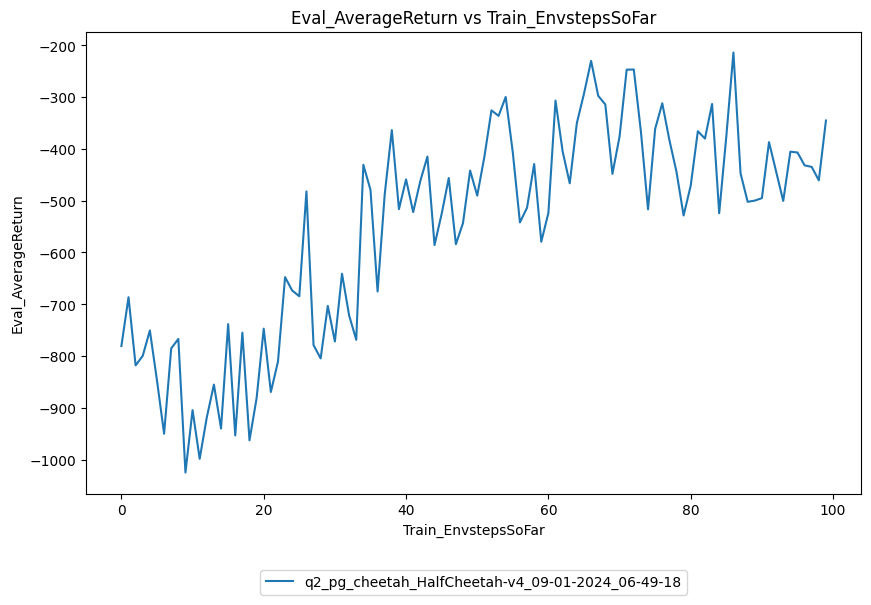

In [9]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in cheetah_basic:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

- policy gradient using baseline

Text(0.5, 1.0, 'Eval_AverageReturn vs Train_EnvstepsSoFar')

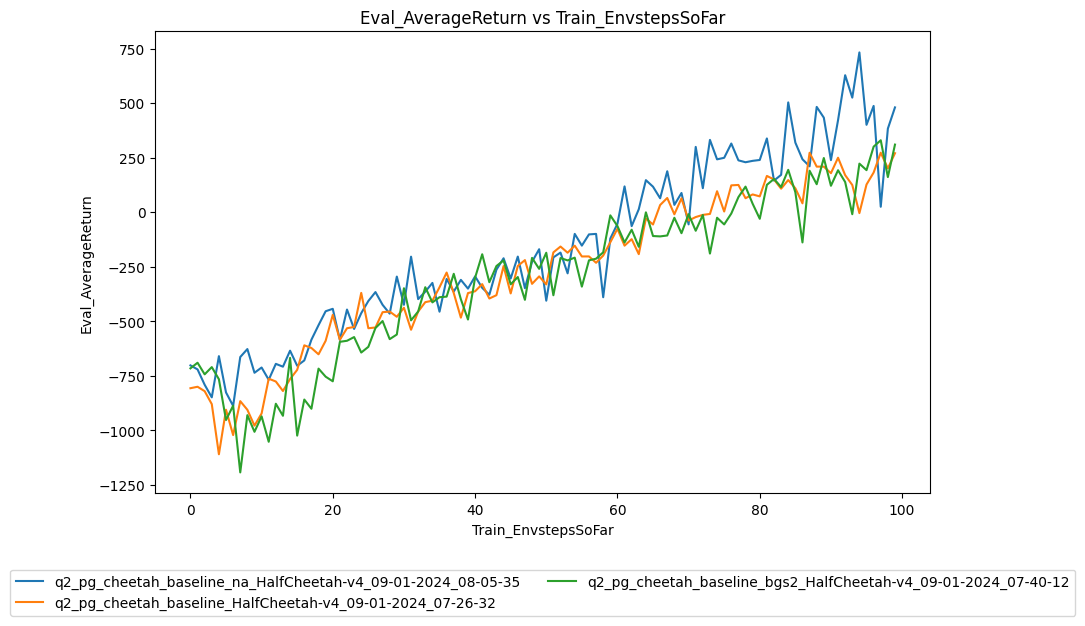

In [10]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in cheetah_baseline:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

## Experiment 3: Generalised Advantage Estimation

In [11]:
lunar = [f for f in run_folders if ('pg_lunar' in f)]
print(lunar)

['/home/haitao/homework_fall2023-main/hw2/data/q2_pg_lunar_lander_lambda0.98_LunarLander-v2_09-01-2024_10-27-37', '/home/haitao/homework_fall2023-main/hw2/data/q2_pg_lunar_lander_lambda1_LunarLander-v2_09-01-2024_12-39-54', '/home/haitao/homework_fall2023-main/hw2/data/q2_pg_lunar_lander_lambda0_LunarLander-v2_09-01-2024_09-56-10', '/home/haitao/homework_fall2023-main/hw2/data/q2_pg_lunar_lander_lambda0.99_LunarLander-v2_09-01-2024_10-53-06', '/home/haitao/homework_fall2023-main/hw2/data/q2_pg_lunar_lander_lambda0.95_LunarLander-v2_09-01-2024_10-07-27']


Text(0.5, 1.0, 'Eval_AverageReturn vs Train_EnvstepsSoFar')

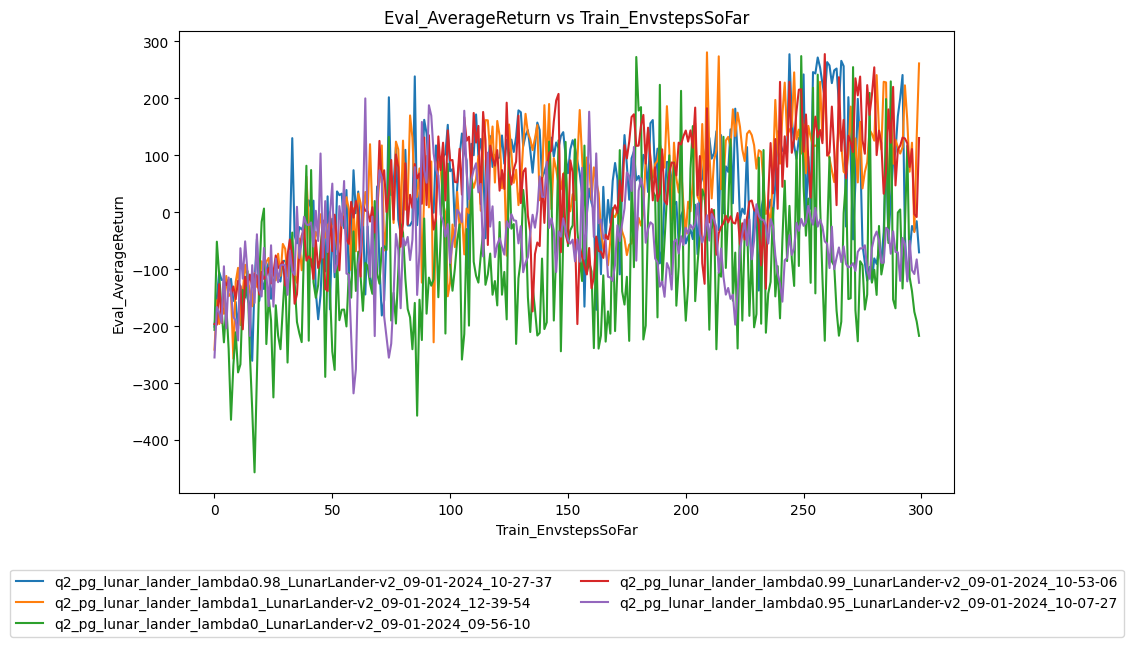

In [12]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in lunar:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

The $\lambda$ controls the tradeoff of bias and varience.

When $\lambda = 0$, GAE becomes $A^\pi(s_t,a_t) = r(s_t,a_t) + \gamma * V^\pi_{\phi}(s_{t+1}) -V^\pi_{\phi}(s_t)$, which is equivalent of single-step advantage estimator, with low-variance and high-bias.

When $\lambda = 1$ , GAE becomes $A^\pi(s_t,a_t) = \delta_t + \gamma * A^\pi(s_{t+1},a_{t+1})$, which is the multi-step actor critic method, with high variance and low bias.

## Experiment 4: Hyperparameters and Sample Efficiency

In [13]:
pendulum_default = [f for f in run_folders if ('pg_pendulum' in f) and ('default' in f)]
pendulum_hyp = [f for f in run_folders if ('pg_pendulum' in f) and ('default'  not in f)]
print(pendulum_default)

['/home/haitao/homework_fall2023-main/hw2/data/q2_pg_pendulum_default_s2_InvertedPendulum-v4_09-01-2024_17-51-19', '/home/haitao/homework_fall2023-main/hw2/data/q2_pg_pendulum_default_s3_InvertedPendulum-v4_09-01-2024_17-54-43', '/home/haitao/homework_fall2023-main/hw2/data/q2_pg_pendulum_default_s5_InvertedPendulum-v4_09-01-2024_18-01-25', '/home/haitao/homework_fall2023-main/hw2/data/q2_pg_pendulum_default_s1_InvertedPendulum-v4_09-01-2024_17-47-56', '/home/haitao/homework_fall2023-main/hw2/data/q2_pg_pendulum_default_s4_InvertedPendulum-v4_09-01-2024_17-58-06']


- default

Text(0.5, 1.0, 'Eval_AverageReturn vs Train_EnvstepsSoFar')

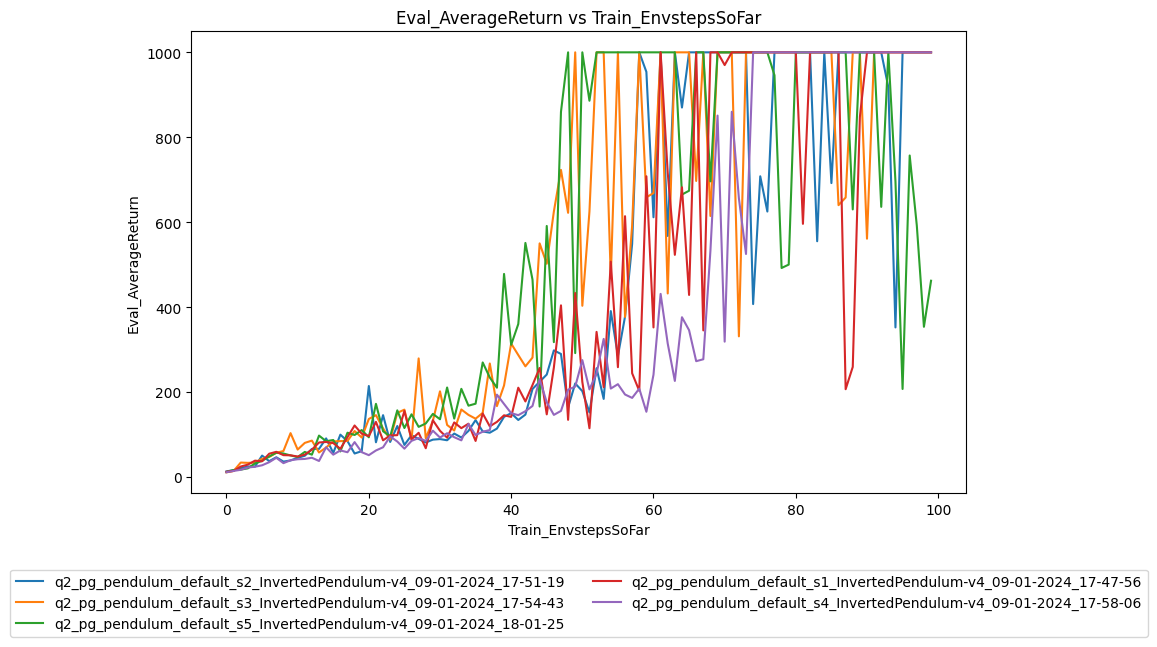

In [14]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in pendulum_default:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

- hyperparameters tune

Text(0.5, 1.0, 'Eval_AverageReturn vs Train_EnvstepsSoFar')

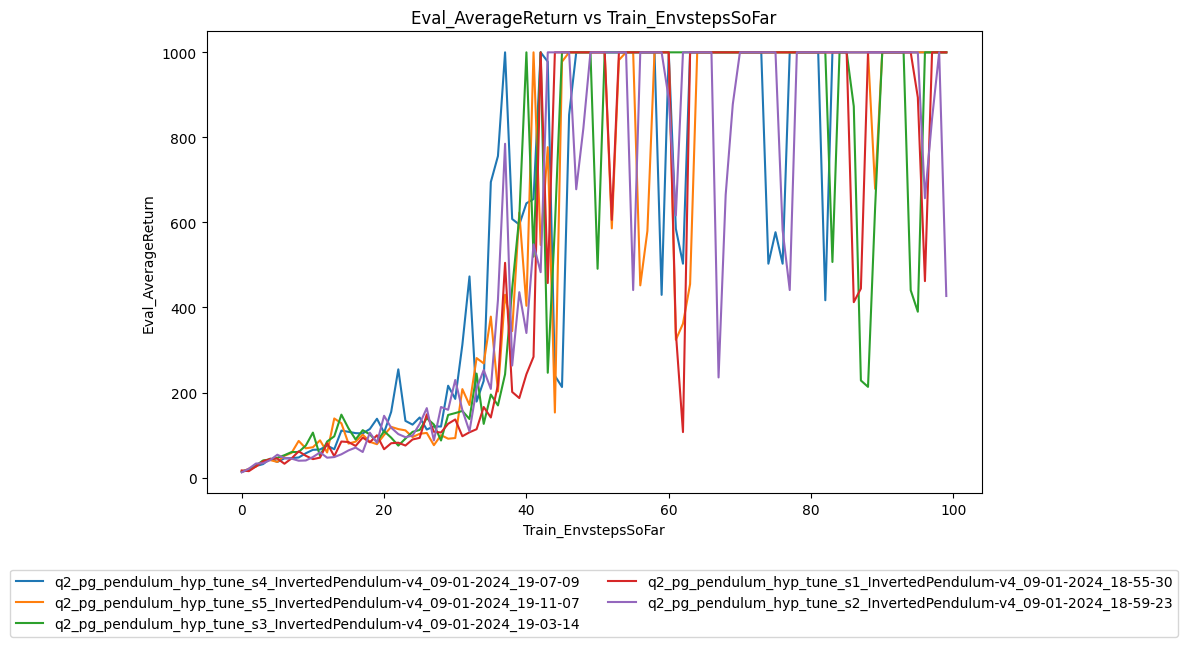

In [15]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in pendulum_hyp:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')